<a href="https://colab.research.google.com/github/rodrigomouracbs/Machine-Learning/blob/main/Classificador_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação da Espécie de Flor a partir de medidas das pétalas e sépalas**
*   **Algoritmo Support Vector Machine**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


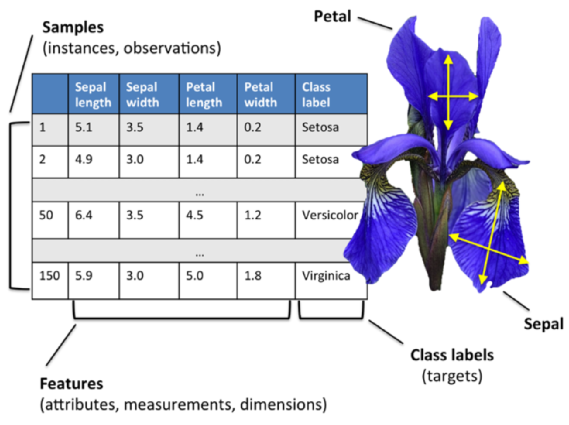

In [3]:
from IPython.display import Image
Image(filename ="/content/iris-data-set.png", width=400, height=300)

In [4]:
#Bibliotecas
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm

In [5]:
#Importando dataset iris
from sklearn import datasets

In [6]:
#Carregando o dataset para o array chamado iris
iris = datasets.load_iris()

In [7]:
type(iris)

sklearn.utils.Bunch

In [8]:
#Visualizando o nome das features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
#Nome das classes (espécies)
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
#Separando dados de treino
treino = iris.data

In [11]:
#Separando dados de classes
classes = iris.target

In [12]:
#Visualizando a forma do array dos dados de treino
#Formato (linhas, colunas)
treino.shape

(150, 4)

In [13]:
#Visualizando a forma do array de classes
classes.shape

(150,)

In [14]:
#Visualizando os dados únicos do array de classes
set(classes)

{0, 1, 2}

In [15]:
#Visualizando os dados de classes
classes[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
treino[:]

# **Visualização dos dados**

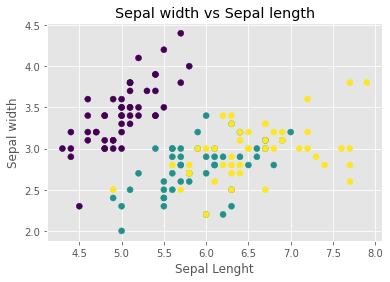

In [16]:
#Plota gráfico de dispersão dos dados de sépalas com relação as classes de espécie
#Cada cor corresponde a uma classe de espécie
from matplotlib import style
style.use("ggplot")
#Sepal lenght vs sepal width
plt.xlabel('Sepal Lenght')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[:,0], treino[:,1], c=classes)

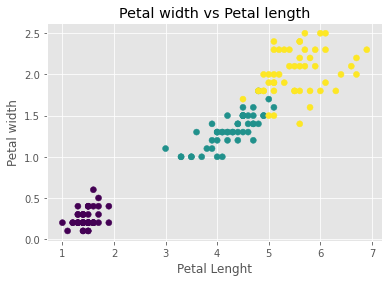

In [17]:
#Plota gráfico de dispersão dos dados de pétalas com relação as classes de espécie
#Cada cor corresponde a uma classe de espécie
from matplotlib import style
style.use("ggplot")
#Sepal lenght vs sepal width
plt.xlabel('Petal Lenght')
plt.ylabel('Petal width')
plt.title('Petal width vs Petal length')
plt.scatter(treino[:,2], treino[:,3], c=classes)

# **Aplicando o SVM**

In [19]:
#Aplicando o SVM para classificar flores usando a base de dados Iris

In [21]:
#Serão utilizados 80% dos dados para treino e 20% para validação
#Visualizando o tamanho dos dados de treino
len(treino[:-30]), len(classes[:-30])

(120, 120)

In [ ]:
#Visualizando os dados de treino
treino[:-30]

In [23]:
#Visualizandos as classes correspondentes
classes[:-30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
#Treinando o Algoritmo SVM
clf = svm.SVC().fit(treino[:-30],classes[:-30])

In [25]:
#Objeto clf
clf #Mostra a parametrização do algoritmo

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
#Cria um array com os dados de teste
teste = treino[-30:]

In [29]:
#Visualizando os dados de teste
teste

array([[6.9, 3.2, 5.7, 2.3],
       [5.6, 2.8, 4.9, 2. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.7, 4.9, 1.8],
       [6.7, 3.3, 5.7, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 2.6, 5.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.4, 3.1, 5.5, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [30]:
#Realizando predições no conjunto de dados teste (validação)
clf.predict(teste)

array([2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1])

In [31]:
#Cria um array com as classes dos dados de teste
classes_teste = classes[-30:]

In [32]:
classes_teste

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

# **Visualizando os resultados da classificação**

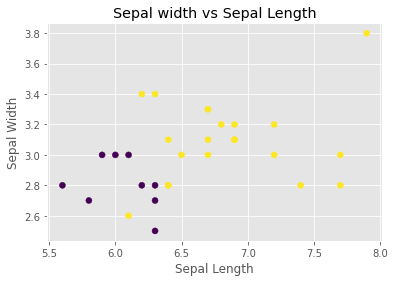

In [33]:
#Gráfico de dispersão entre as colunas Sepal Lenght, Sepal Width e a respectiva classe
#Os pontos em roxo são aqueles onde o classificador errou
from matplotlib import style
style.use ("ggplot")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal width vs Sepal Length')
plt.scatter(treino[-30:,0], treino[-30:,1],c=clf.predict(teste))

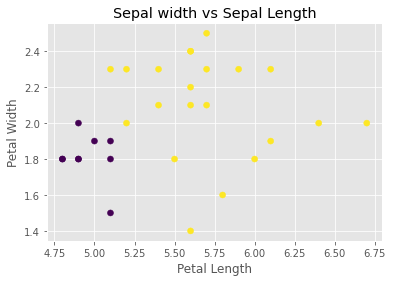

In [34]:
#Gráfico de dispersão entre as colunas Petal Lenght, Petal Width e a respectiva classe
#Os pontos em roxo são aqueles onde o classificador errou
from matplotlib import style
style.use ("ggplot")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Sepal width vs Sepal Length')
plt.scatter(treino[-30:,2], treino[-30:,3],c=clf.predict(teste))

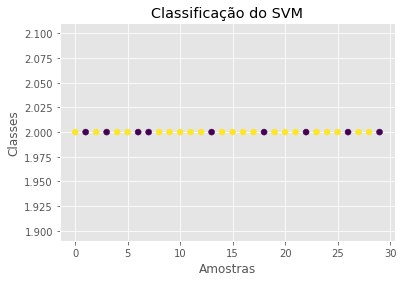

In [35]:
#Gráfico de instâncias e as respectivas predições
from matplotlib import style
style.use("ggplot")
plt.xlabel('Amostras')
plt.ylabel('Classes')
plt.title('Classificação do SVM')
plt.scatter(range(len(classes_teste)),classes_teste,c=clf.predict(teste))

# **Matriz de Confusão**

In [36]:
print (pd.crosstab(classes_teste,clf.predict(teste),rownames=['Observado'],colnames=['Predito'],margins=True),'')

Predito    1   2  All
Observado            
2          9  21   30
All        9  21   30 


# **Validação Cruzada**

In [37]:
#Função que retorna a acurácia após realizar um procedimento de cross validation
def Acuracia(clf,X,y):
  resultados = cross_val_predict(clf,X,y,cv=10)
  return metrics.accuracy_score(y,resultados)

In [38]:
Acuracia(clf,treino,classes)

0.9733333333333334

# **Métricas de Avaliação**

In [39]:
#Imprime as métricas: precisão, revocação e Medida F1
resultados = cross_val_predict(clf,treino,classes,cv=10)
valor_classes=[0,1,2]
print(metrics.classification_report(classes,resultados,valor_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

